# Building a Simple Neural Network for Classification

## step 1: Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## step 2: Load and Prepare the Data

In [3]:
# Load raw MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Flatten 28x28 images to 784-dimensional vectors
x_train_flattened = x_train_normalized.reshape(-1, 784)
x_test_flattened = x_test_normalized.reshape(-1, 784)

# One-hot encode labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [4]:
# Run the raw dataset 
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

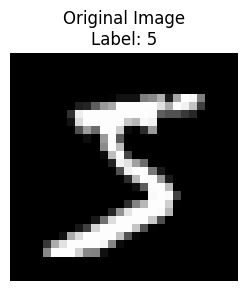

In [6]:
# Visualize a sample before normalization
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Original Image\nLabel: {y_train[0]}")
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

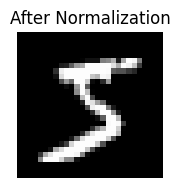

In [7]:
# Visualize the same image after normalization
plt.subplot(1, 3, 2)
plt.imshow(x_train_normalized[0], cmap='gray')
plt.title("After Normalization")
plt.axis('off')

In [8]:
# Flatten 28x28 images to 784-dimensional vectors
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)


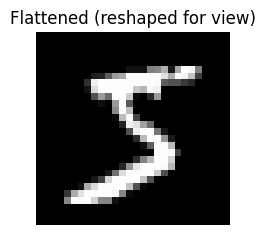

In [9]:
# Visualize the flattened vector as a heatmap
plt.subplot(1, 3, 3)
plt.imshow(x_train_flat[0].reshape(28, 28), cmap='gray')
plt.title("Flattened (reshaped for view)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Original label: 5
One-hot encoded vector:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


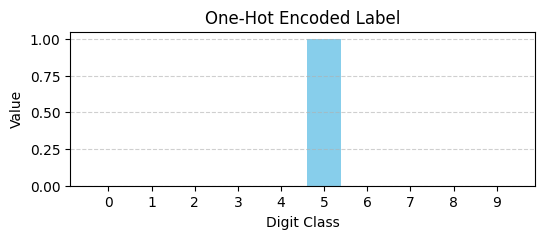

In [11]:
# One-hot encode visual

# Choose a sample index
sample_index = 0

# Original label
print(f"Original label: {y_train[sample_index]}")

# One-hot encoded vector
encoded_vector = y_train_encoded[sample_index]
print(f"One-hot encoded vector:\n{encoded_vector}")

# Plot the one-hot vector
plt.figure(figsize=(6, 2))
plt.bar(range(10), encoded_vector, color='skyblue')
plt.xticks(range(10))
plt.title("One-Hot Encoded Label")
plt.xlabel("Digit Class")
plt.ylabel("Value")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


##  step 3: Build the Neural Network

In [15]:
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## Step 4: Compile the Model

In [16]:
model.compile(
optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Step 5: Train the Model

In [17]:
history = model.fit(
    x_train_flattened, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9211 - loss: 0.2673 - val_accuracy: 0.9570 - val_loss: 0.1437
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9656 - loss: 0.1117 - val_accuracy: 0.9693 - val_loss: 0.1055
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9767 - loss: 0.0756 - val_accuracy: 0.9684 - val_loss: 0.1000
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9631 - val_loss: 0.1221
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9712 - val_loss: 0.0981


## Step 6: Evaluate the Model

In [18]:
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test_encoded)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9744 - loss: 0.0871
Test accuracy: 0.9744


## Step 7: Visualize Training History

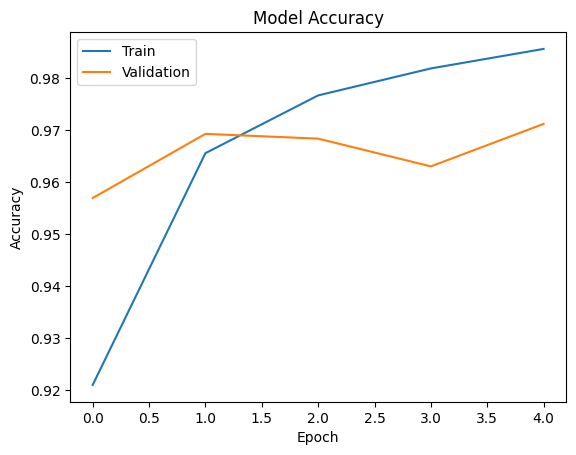

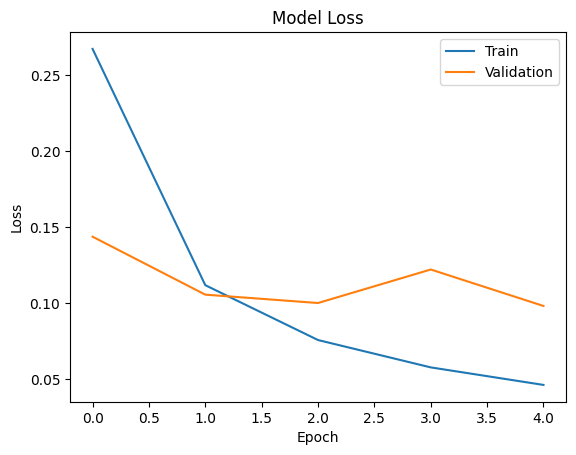

In [19]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Run a Prediction

In [20]:
index = np.random.randint(0, len(x_test_flattened))
sample_image = x_test_flattened[index].reshape(1, 784)
true_label = np.argmax(y_test_encoded[index])
predicted_label = np.argmax(model.predict(sample_image))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step


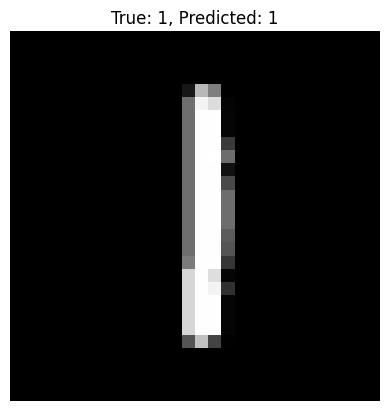

In [21]:
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
